# Drosophila Circadian Clock

This is a model of the oscillating Drosophila period protein(PER). This model is based on the model introduced in the following publication.

* A. Goldbeter, "A model for circadian oscillations in the Drosophila period protein(PER)", Proc R Soc Lond B Biol Sci, Vol.261:319-324, Sep 1995.

In [1]:
%matplotlib inline
import numpy
from ecell4 import *

In [2]:
with reaction_rules():
    ~M > M | 0.76 / (1 + Pn ** 3)
    M > ~M | 0.65 * M / (0.5 + M)
    ~P0 > P0 | 0.38 * M
    P0 == P1 | (3.2 * P0 / (2 + P0), 1.58 * P1 / (2 + P1))
    P1 == P2 | (5 * P1 / (2 + P1), 2.5 * P2 / (2 + P2))
    P2 == Pn | (1.9, 1.3)
    P2 > ~P2 | 0.95 * P2 / (0.2 + P2)

In [3]:
y0 = {"M": 3.61328202e-01, "Pn": 6.21367e-01, "P0": 3.01106835e-01, "P1": 3.01106835e-01, "P2": 3.61328202e-01}
obs = run_simulation(numpy.linspace(0, 100, 400), y0, return_type='observer')

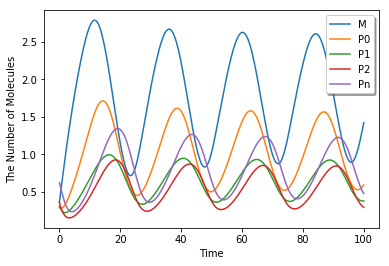

In [4]:
show(obs)

In [5]:
viz.plot_number_observer_with_nya(obs, x="Pn", y=("M", "P0", "P1", "P2"), to_png=True)